In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as img
from sklearn.cluster import k_means
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder   
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [12]:
# load the test_csv and train_csv
test_csv = pd.read_csv("test.csv")
train_csv = pd.read_csv("train.csv")
sample_csv = pd.read_csv("sample_submission.csv")

(784,)


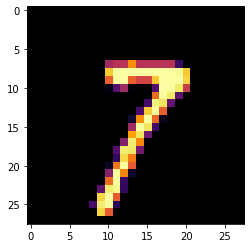

In [13]:
# displaying the number in pixelated form as image (vector points to image for our convenience)

df = pd.concat((train_csv, test_csv))

features = df.columns.drop('label')
print(features.shape)


dum = pd.get_dummies(df, columns=['label'])
df = pd.concat([df['label'], dum]) 

arr = np.asarray(np.array(train_csv.loc[np.random.randint(0, 784)][1:]).reshape(-28, 28))
plt.imshow(arr, cmap='inferno', vmin=0, vmax=255)
plt.show()

In [14]:
X_train = train_csv.drop(['label'], axis=1)
y_train = train_csv['label']

(X_train.isnull().sum())
(y_train.isnull().sum())


X_train = (X_train).values.reshape(-1,28,28,1)
test_csv = (test_csv).values.reshape(-1,28,28,1)

X_train = X_train/255
test_csv = test_csv/255

In [15]:
y_train = OneHotEncoder(sparse=False).fit_transform(y_train.values.reshape(-1,1))

y_train = y_train/255

In [16]:
X_train, Y_train, X_test, Y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=452)

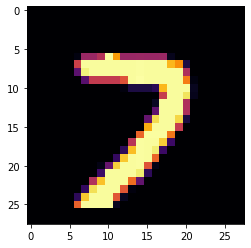

In [17]:
# Image representation of the data after preprocessing

imageviewer = plt.imshow(X_train[np.random.randint(0, 784)][:,:,0], cmap='inferno', vmin=0, vmax=1)

In [19]:
DTC = DecisionTreeClassifier(max_depth=8, random_state=452, min_samples_split=8)
BC = BaggingClassifier(DTC, n_estimators=100, max_samples=0.4, random_state=452)

BC.fit(X_train, y_train)
y_pred = BC.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)

TypeError: BaseBagging.fit() got an unexpected keyword argument 'return_sequences'